In [1]:
%matplotlib inline

import pandas as pd
import tables as tb
import tstables as tst
import numpy as np

from pylab import mpl, plt
from datetime import datetime
from data.config import GeneralConfig, load_config
from data.store import DataStore

figsize = (60, 20)

symbol = 'BTCUSDT'
tf = '4h'
# tf = None

config = GeneralConfig('E:/store/')
data = DataStore(config).load(symbol, tf)

# data.drop(columns = ['open', 'high', 'low', 'volume'], inplace=True)
data

,open,high,low,close,volume
2020-01-01 04:00:00,7189.43,7239.74,7170.15,7221.65,12055.759
2020-01-01 08:00:00,7221.80,7230.00,7193.52,7205.26,5738.351
2020-01-01 12:00:00,7205.26,7234.57,7174.00,7192.65,10036.293
2020-01-01 16:00:00,7192.74,7260.43,7191.79,7229.49,11010.528
2020-01-01 20:00:00,7229.66,7248.00,7210.81,7226.35,7787.862
...,...,...,...,...,...
2023-02-27 08:00:00,23541.00,23547.00,23331.00,23411.10,53778.498
2023-02-27 12:00:00,23411.10,23445.90,23320.00,23420.00,46822.503
2023-02-27 16:00:00,23419.90,23888.00,23369.10,23546.50,184987.748
2023-02-27 20:00:00,23546.50,23603.90,23140.00,23262.50,166667.763


In [2]:
def calc(data, ma_fast):
    ma_slow = ma_fast * 4

    cn_ma_fast = f'ma_fast_{ma_fast}'
    cn_ma_slow = f'ma_slow_{ma_slow}'
    cn_position = f'position_{ma_fast}'
    cn_strat = f'strat_{ma_fast}'
    cn_strat_cs = f'strat_cs_{ma_fast}'

    data[cn_ma_fast] = data.close.rolling(ma_fast).mean()
    data[cn_ma_slow] = data.close.rolling(ma_slow).mean()

    data[cn_position] = np.where(data[cn_ma_fast] > data[cn_ma_slow], 1, -1)
    data.dropna(inplace=True)

    data[cn_strat] = data[cn_position].shift(1) * data.returns
    data[cn_strat_cs] = data[cn_strat].cumsum().apply(np.exp)

    data[f'strat_{ma_fast}_{ma_slow}'] = data[cn_strat_cs]
    data.drop(columns=[cn_ma_fast, cn_ma_slow, cn_strat, cn_strat_cs], inplace=True)


def calc_multiple(data):
    calc(data, 10)
    calc(data, 20)
    calc(data, 30)
    calc(data, 40)
    calc(data, 50)
    calc(data, 60)
    calc(data, 70)
    calc(data, 80)
    calc(data, 90)
    calc(data, 100)


data['returns'] = np.log(data.close / data.close.shift(1))
data['creturns'] = data.returns.cumsum().apply(np.exp)

%time calc_multiple(data)

CPU times: total: 46.9 ms
Wall time: 55.1 ms


<AxesSubplot: >

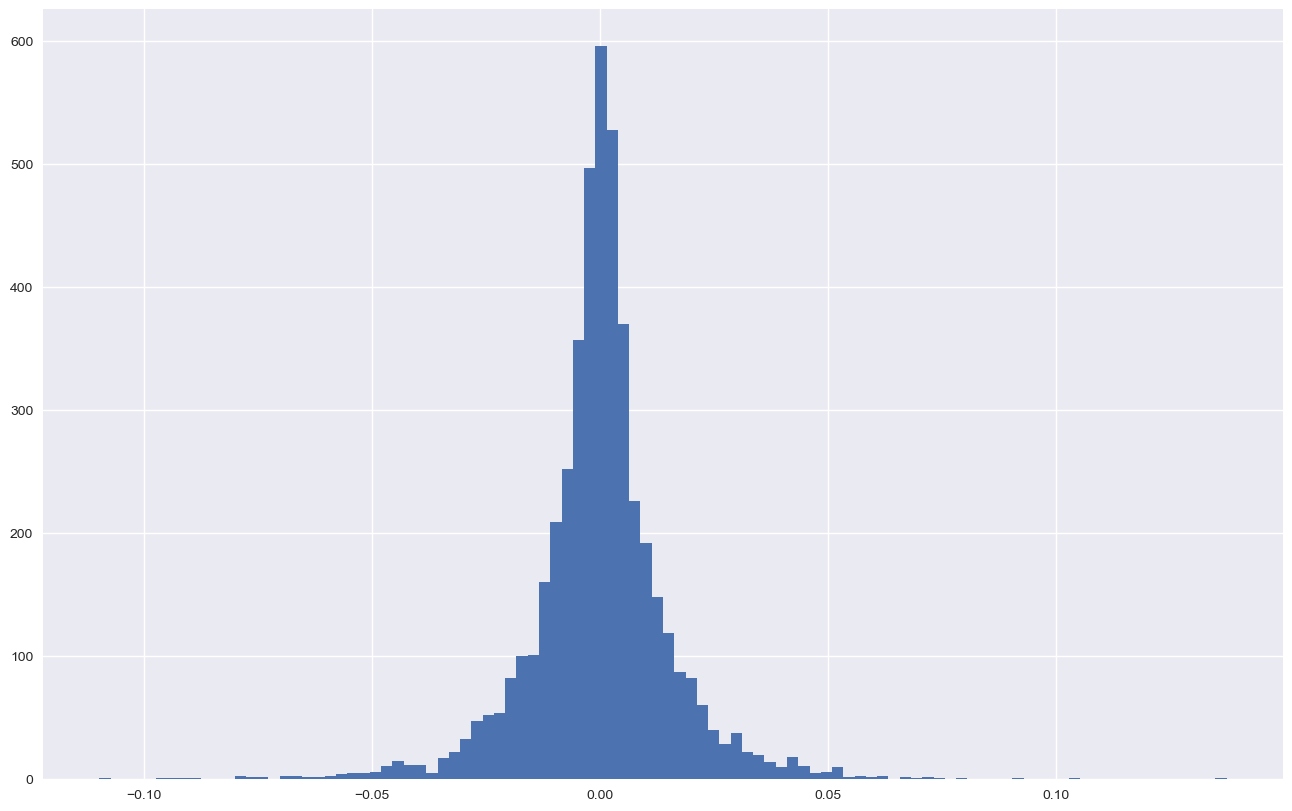

In [7]:
plt.style.use('seaborn-v0_8')
plt.rc('legend', fontsize=24)
mpl.rcParams['savefig.dpi'] = 5000

# data.plot(title='BTCUSDT daily | MA 50/200', figsize=figsize)
# data['position_30'].plot(ylim=[-1.1, 1.1], title='Market Positioning', figsize=figsize)
data['returns'].hist(bins=100, figsize=(16, 10))

data['creturns'].plot(figsize=figsize)

data[[
    'creturns',
    'strat_10_40',
    # 'strat_20_80',
    # 'strat_30_120',
    # 'strat_40_160',
    # 'strat_50_200',
    'strat_60_240',
    'strat_70_280',
    'strat_80_320',
    'strat_90_360',
    # 'strat_100_400'
    ]].plot(figsize=figsize)